<a href="https://colab.research.google.com/github/lakshitgosain/Transformers-for-NLP/blob/main/Transformers_I03_Neural_Machine_translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Machine Translation

The outplut length can differ from the numbe of tokens being input to the model

In [15]:
!pip install datasets transformers sentencepiece

In [16]:
from datasets import load_dataset
data=load_dataset('kde4',lang1='en',lang2='fr')
data

  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

After Tokenizing the new words will start with __ and the subwords will have no __, The case with last tokenizer was that the subword started with ##

In [17]:
#New
#targets=tokenizer(text_target=es_sentence)

In [18]:
#Create a small subset fro the whole dataset
small=data['train'].shuffle(seed=42).select(range(1000))

In [19]:
split=small.train_test_split(seed=42)

In [20]:
split['train'][0]

{'id': '169005',
 'translation': {'en': '& Reduce Tree', 'fr': "& Refermer l' arborescence"}}

In [21]:
from transformers import AutoTokenizer

In [22]:
checkpoint='Helsinki-NLP/opus-mt-en-fr'
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [23]:
en=split['train'][5]['translation']['en']

In [24]:
fr=split['train'][5]['translation']['fr']

In [25]:
en,fr

('You can either pick a file or enter its name in the Location: box.',
 'Vous pouvez soit choisir un fichier soit saisir son nom dans la zone de texte Emplacement.')

In [28]:
inputs=tokenizer(en)

In [29]:
inputs

{'input_ids': [213, 115, 1828, 8437, 15, 1437, 57, 3307, 96, 1129, 18, 4, 4577, 37, 5311, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [32]:
targets=tokenizer(text_target=fr)

In [33]:
inputs

{'input_ids': [213, 115, 1828, 8437, 15, 1437, 57, 3307, 96, 1129, 18, 4, 4577, 37, 5311, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [34]:
targets

{'input_ids': [344, 1069, 345, 4094, 34, 2428, 345, 9315, 113, 689, 31, 8, 1283, 5, 1470, 21708, 3, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [36]:
tokenizer.convert_ids_to_tokens(targets['input_ids'])

['▁Vous',
 '▁pouvez',
 '▁soit',
 '▁choisir',
 '▁un',
 '▁fichier',
 '▁soit',
 '▁saisir',
 '▁son',
 '▁nom',
 '▁dans',
 '▁la',
 '▁zone',
 '▁de',
 '▁texte',
 '▁Emplacement',
 '.',
 '</s>']

In [38]:
bad_targets=tokenizer(fr)
tokenizer.convert_ids_to_tokens(bad_targets['input_ids'])
#We will receive suboptimal tokens/targets

['▁V',
 'ous',
 '▁po',
 'uv',
 'ez',
 '▁so',
 'it',
 '▁cho',
 'is',
 'ir',
 '▁un',
 '▁fi',
 'chi',
 'er',
 '▁so',
 'it',
 '▁s',
 'ais',
 'ir',
 '▁son',
 '▁no',
 'm',
 '▁dans',
 '▁la',
 '▁zone',
 '▁de',
 '▁text',
 'e',
 '▁Em',
 'placement',
 '.',
 '</s>']

#Seq2Seq Basics

Language model is a model that predicts the distribution for the next word in the sentence given the previous words in the sequence.

This is a Many-to Many token classification task like NER

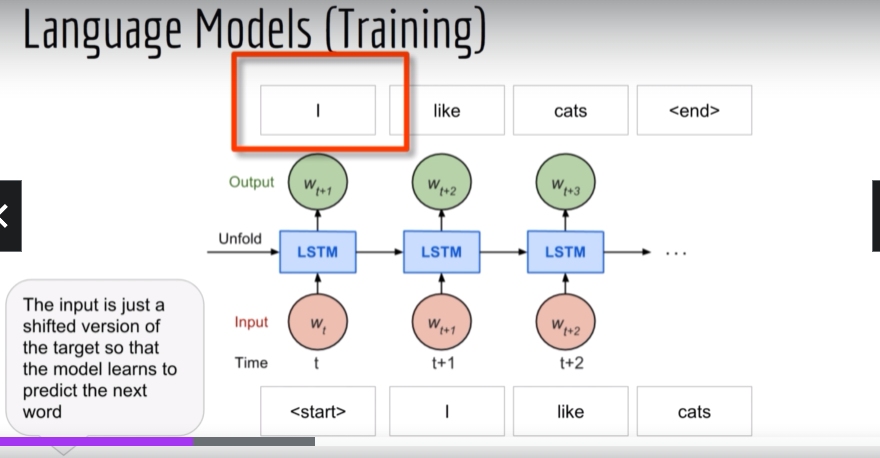



Language models can be used to generate text without even giving a initial sequence. They can generate the sequence by themselves.

The Input always starts with a <Start> tag using which it can generate sentence.

After start tag, it predcits the next word , suppose 'The'

Using this it can predict the next word 'cat'.

THis goes on as above .

THe model stops when it encounters <end>/end of token sentence



**Encoder**


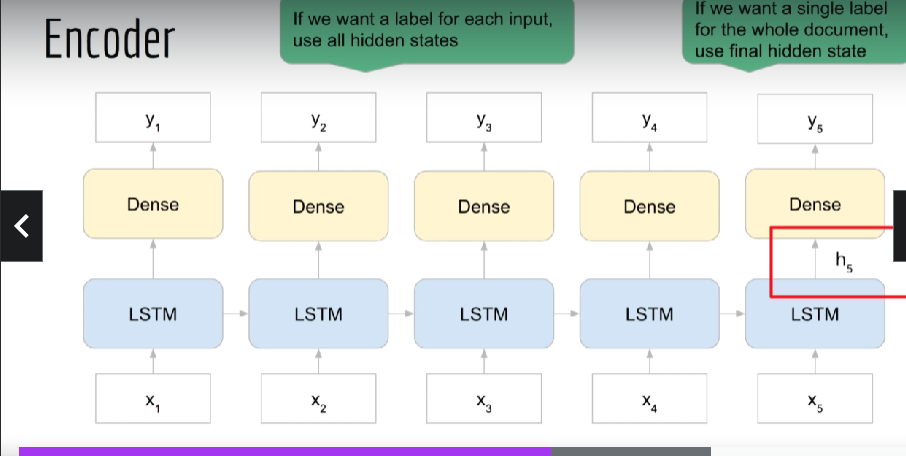




We can combine the encoder and decoder to form the Seq2Seq Model

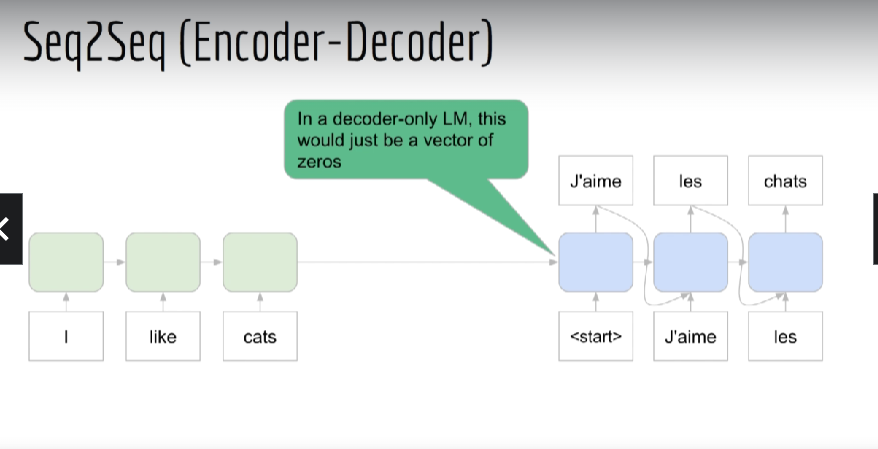